In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn import preprocessing, decomposition

X, y, X_test, X_valid = load_data("starting_kit/data") 

# Normalisation des données

In [2]:
from sklearn import preprocessing

#Normalizing data
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Réduction de dimension (PCA)
Pour commencer, gardons 100% des valeurs et observons la variance de chaque composante.

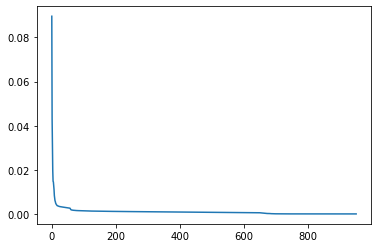

In [3]:
from sklearn import decomposition

#PCA analysis
pca_full = decomposition.PCA(n_components=952)
pca_full.fit(X_scaled)

#Pourcentage de variance entre les composantes
plt.plot(pca_full.explained_variance_ratio_)

Nous voyons que seulement les $n$ premières valeurs semblent contenir une information importante.
Nous considérerons donc toute les autre features comme du bruit qui risquerait de faire overfit notre modèle.

Nous décidons donc de réaliser une PCA en gardant ces $n$ composantes pour l'entraînement du modèle.

In [4]:
#PCA analysis
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

# plt.axvline(x = 20, color = 'r', linestyle=':',label = 'Troncature') 

# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel("$Feature$")
# plt.ylabel("$Variance$")
# plt.legend()
# plt.grid()

PCA(n_components=2)

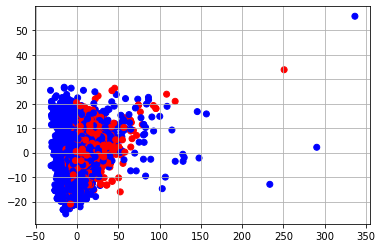

In [5]:
X_pca = pca.transform(X_scaled)
df = pd.DataFrame(X_pca)
df.head(5)

colors = y.replace({0:'b', 1:'r'}).values.flatten()

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=colors[:])
plt.grid()
plt.show()
# plt.plot(, 'bx')

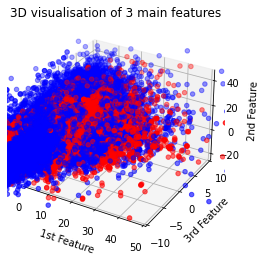

In [6]:
from IPython.display import Image, set_matplotlib_formats 
# set_matplotlib_formats('svg')
#PCA analysis
pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
df = pd.DataFrame(X_pca)
df.head(5)

colors = y.replace({0:'b', 1:'r'}).values.flatten()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=colors[:])
ax.set_title("3D visualisation of 3 main features")
ax.set_xlabel("1st Feature")
ax.set_zlabel("2nd Feature")
ax.set_ylabel("3rd Feature")
ax.set_xlim([0,50])
ax.set_ylim([-10,10])
ax.grid()
# plt.plot(, 'bx')

# Comparaison PCA et FeatureAgglomeration
Comme nous pouvons constater sur le plot 3D précedent, les données ne sont pas divisées de manière linéraire, un modèle tel que la régression logistique ne serait donc probablement pas très efficace.

In [2]:
from sklearn import cluster
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import PCA, KernelPCA
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import uniform

In [3]:

Xtr, Xte, ytr, yte = model_selection.train_test_split(X[:100], y[:100], 
                                                      test_size=0.2, 
                                                      random_state=0)

scalers_list = [StandardScaler, RobustScaler, QuantileTransformer]
reduction_list = [KernelPCA, GaussianRandomProjection, FeatureAgglomeration]
params_grid_list = [{'reduction__n_components': uniform(loc=10, scale=700), "reduction__kernel":["linear", "poly", "rbf"]},
                    {'reduction__n_components':[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 700, 800]},
                    {'reduction__n_clusters':[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]}
                ]

for scaler in scalers_list:
    for reduction, params_grid in zip(reduction_list, params_grid_list):
        pipe = Pipeline([('scaler', scaler()),
                        ('reduction', reduction()),
                        ('simple_tree', KNeighborsClassifier(algorithm='brute',
                                                                n_neighbors=10,
                                                                p=1))
                        ])

        grid_model = model_selection.RandomizedSearchCV(pipe,
                                    params_grid,
                                    n_iter=5,
                                    scoring = 'balanced_accuracy',
                                    cv = 3,
                                    n_jobs=2,
                                    verbose=2)


        grid_model.fit(Xtr, ytr.values.flatten(), )
        print(grid_model.score(Xte, yte.values.flatten()))
        print(grid_model.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0.8592520603323925
{'reduction__kernel': 'linear', 'reduction__n_components': 177.6607185147289}


In [3]:

from sklearn.model_selection import cross_val_score

pipe = Pipeline([('scaler', RobustScaler()),
                            ('reduction', KernelPCA(450, kernel='poly')),
                            ('simple_tree', KNeighborsClassifier(algorithm='brute',
                                                                    n_neighbors=10,
                                                                    p=1))
                            ])

cross_val_score(pipe, X, y.values.flatten(), cv=3, scoring='balanced_accuracy', n_jobs=4)




C:\Users\EDUARD~1.VIT\AppData\Local\Temp/ipykernel_16804/673842608.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


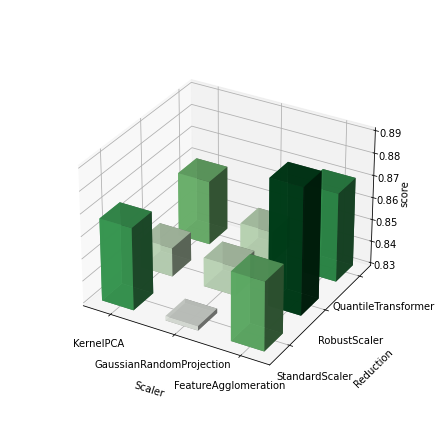

In [84]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

scalers_list = ["StandardScaler", "RobustScaler", "QuantileTransformer"]
reduction_list = ["KernelPCA", "GaussianRandomProjection", "FeatureAgglomeration"]
scores = np.array([[0.867, 0.832, 0.861], [0.843, 0.843, 0.887], [0.859, 0.844, 0.870]]) - 0.83

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

lx= len(scores[0])            # Work out matrix dimensions
ly= len(scores[:,0])
xpos = np.arange(0,lx,1)    # Set up a mesh of positions
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = 0.83 #np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = scores.flatten()

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
color_values = cm.Greens(norm(fracs.tolist()))

ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=color_values, alpha=0.9, shade=True)

ax.set_zlim((0.83, 0.89))
ticksx = np.arange(0.5, 3, 1)
plt.xticks(ticksx, reduction_list)

ticksy = np.arange(0.6, 3, 1)
plt.yticks(ticksy, scalers_list)
ax.set_xlabel('Scaler', labelpad=30)
ax.set_ylabel('Reduction', labelpad=42)
ax.set_zlabel('score')
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=22)
ax.dist=13

plt.savefig('barGraph.png')
plt.show()